<a href="https://colab.research.google.com/github/Shriharsh-Deshmukh/100-Days-100-Models/blob/main/(Pr_8)iris_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

In [2]:
data = sns.load_dataset("iris")

**Exploratory Data Analysis (EDA)**

In [3]:
print("First five rows of the dataset:\n", data.head())
print("\nSummary statistics:\n", data.describe())
print("\nMissing values check:\n", data.isnull().sum())

First five rows of the dataset:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Summary statistics:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Missing values check

**Visualizing the dataset**

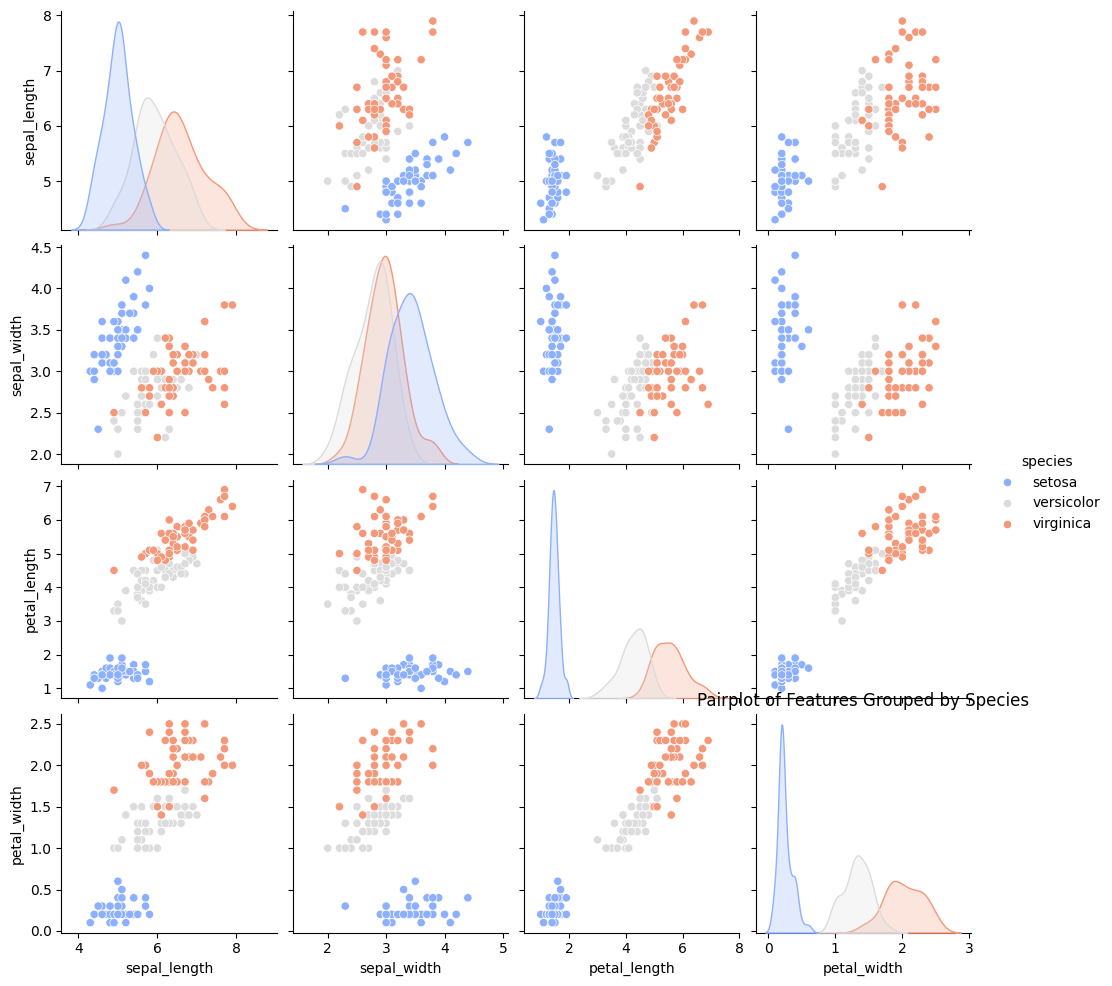

In [4]:
sns.pairplot(data, hue="species", palette="coolwarm")
plt.title("Pairplot of Features Grouped by Species")
plt.show()

**Data Preprocessing**

In [5]:
X = data.drop("species", axis=1)
y = data["species"]

**Encoding categorical target variable**

In [6]:
y = pd.factorize(y)[0]

**Splitting the dataset**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


**Standardizing the features**

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Building the k-NN Model**

In [9]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

**Making Predictions**

In [10]:
y_pred = knn.predict(X_test_scaled)

**Model Evaluation**

In [11]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.79      1.00      0.88        15
           2       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45


Accuracy Score: 0.9111111111111111


**Visualizing Results**
**Confusion Matrix Heatmap **

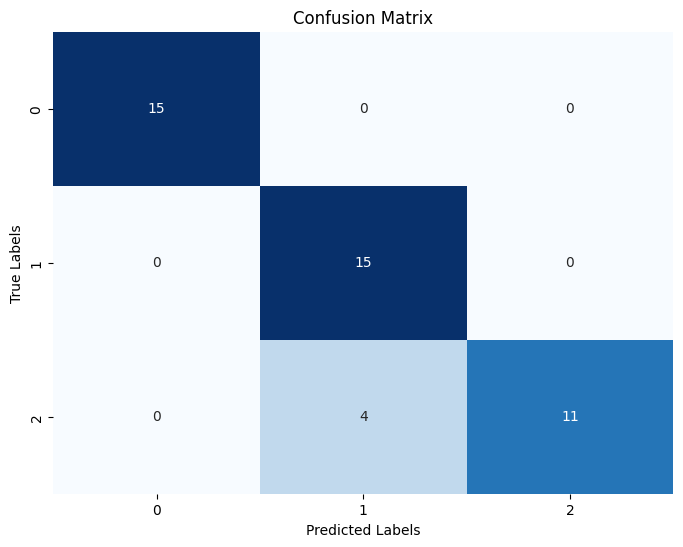

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**2D Visualization using PCA (if features > 2)**

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


**Visualizing PCA-transformed data**

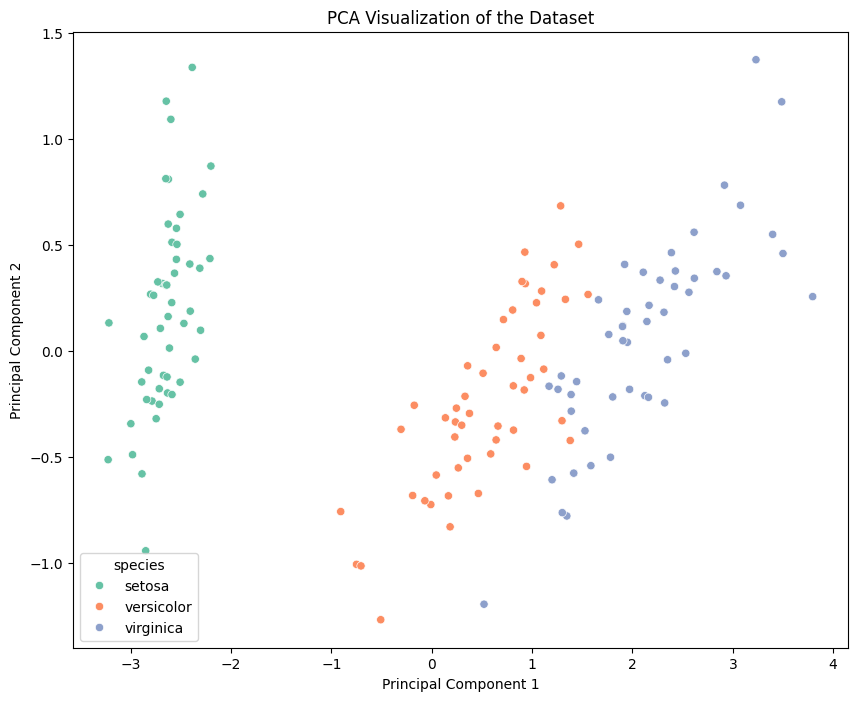

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['species'], palette="Set2")
plt.title("PCA Visualization of the Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

**Error Rate vs. Number of Neighbors**

In [15]:
error_rates = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred_i = knn.predict(X_test_scaled)
    error_rates.append(np.mean(y_pred_i != y_test))

**Plotting the error rates**

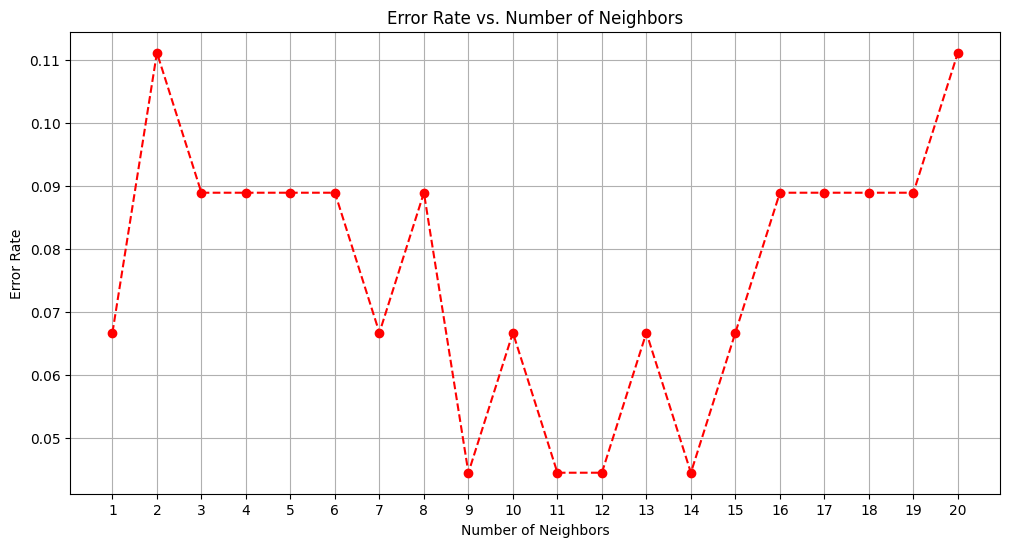

Script execution completed. You can customize the dataset path and parameters as needed.


In [16]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='--', color='r')
plt.title("Error Rate vs. Number of Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Error Rate")
plt.xticks(range(1, 21))
plt.grid()
plt.show()

print("Script execution completed. You can customize the dataset path and parameters as needed.")
